# Import Data

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
import pandas as pd

dataset  = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Tetramestre 4/Business Inteligence/02-21-2023/EarlyRetirementPrediction.csv")
dataset.head()


,Retire Before 65 Years Old,Gender,Desease,Education Level,Marital Status,Monthly Income,Employee/Employer,Dependants,Unemployment Rate,Stock Market,Credit Score,Government Bonds Return
0,1,1,1,3,0,18000,0,4,3.444876,24066.16667,699,7.715833
1,0,1,0,3,0,32000,0,1,5.023797,42063.16667,639,5.414833
2,0,1,1,4,0,20000,0,2,5.355220,30100.50000,610,7.962750
3,0,0,1,4,1,35000,1,1,3.843570,24066.16667,649,7.715833
4,0,0,1,3,0,27000,0,1,4.949226,19439.00000,638,8.024167


# Ensamble class to be used for different Algorithms

In [66]:
# Model Class to be used for different ML algorithms
from sklearn.model_selection import KFold, cross_val_score

class ClassifierModel(object):
    def __init__(self, clf, params=None):
        self.clf = clf(**params)
def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
    
def fit(self,x,y):
    return self.clf.fit(x,y)
    
def feature_importances(self,x,y):
    return self.clf.fit(x,y).feature_importances_
    
def predict(self, x):
    return self.clf.predict(x)
def trainModel(model, x_train, y_train, x_test, n_folds, seed):
    cv = KFold(n_splits= n_folds, random_state=seed, shuffle=True)
    scores = cross_val_score(model.clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [67]:
# Random Forest parameters

import pandas as pd
import numpy as np

X = dataset.iloc[:, 1:12].values
y = dataset.iloc[:, 0].values

# Feature Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = MinMaxScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

rf_params = {
    'n_estimators': 400,
    'max_depth': 5,
    'min_samples_leaf': 3,
    'max_features' : 'sqrt',
}
rfc_model = ClassifierModel(clf=RandomForestClassifier, params=rf_params)
rfc_scores = trainModel(rfc_model,X_train_norm, y_train, X_test_norm, 5, 5)
rfc_scores

array([0.78333333, 0.8       , 0.85833333, 0.80833333, 0.79583333])

# Random Forest

In [4]:
import pandas as pd
import numpy as np

X = dataset.iloc[:, 1:12].values
y = dataset.iloc[:, 0].values

In [26]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Feature Scaling
classifier = RandomForestClassifier(random_state=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = MinMaxScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

# Random Forest parameters
rf_params = {
    'n_estimators': 400,
    'max_depth': 5,
    'min_samples_leaf': 3,
    'max_features' : 'sqrt',
}
rfc_model = ClassifierModel(clf=RandomForestClassifier, params=rf_params)
rfc_scores = trainModel(rfc_model,X_train, y_train, X_test, 5, 0)
rfc_scores

# Predict
classifier.fit(X_train_norm, y_train)
y_pred = classifier.predict(X_test_norm)

# Metrics
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f'Accuracy score with min-max normalization: {accuracy_score(y_test, y_pred)}')


Accuracy score with min-max normalization: 0.81
[[133  28]
 [ 29 110]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       161
           1       0.80      0.79      0.79       139

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

Accuracy score with min-max normalization: 0.81


# Logistic regresion

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = dataset.iloc[:, 1:12].values
y = dataset.iloc[:, 0].values

In [40]:
# model = LogisticRegression(solver='liblinear', random_state=0)
# model.fit(X, y)
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='warn', n_jobs=None, penalty='l2',
#                    random_state=0, solver='liblinear', tol=0.0001, verbose=0,
#                    warm_start=False)

model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)
# model.classes_
# model.intercept_
# model.coef_
model.predict_proba(X)
model.predict(X)
model.score(X, y)




0.82

In [41]:
# Metrics
print(confusion_matrix(y,model.predict(X)))
print(classification_report(y,model.predict(X)))
print(f'Accuracy score with min-max normalization: {accuracy_score(y,model.predict(X))}')

[[665 129]
 [141 565]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       794
           1       0.81      0.80      0.81       706

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500

Accuracy score with min-max normalization: 0.82


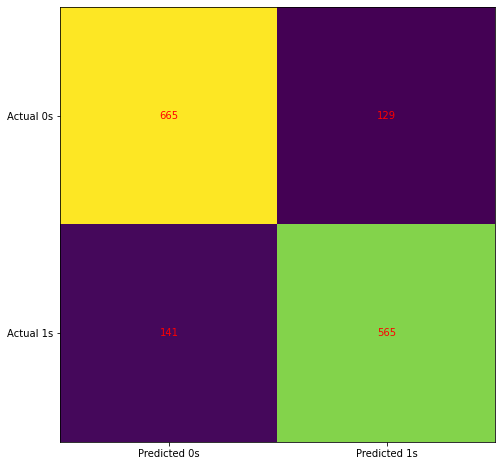

In [42]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()